# **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import seaborn as sns
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose # Error Trend Seasonality decomposition

# holt winters
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   # single exponential smoothing as in ewm of pandas
from statsmodels.tsa.holtwinters import ExponentialSmoothing # double and triple exponential smoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

import statsmodels.tsa.holtwinters     as      ets
import statsmodels.tools.eval_measures as      fa
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.holtwinters     import  SimpleExpSmoothing
!pip list
!pip install darts
from darts.utils.statistics import check_seasonality
from darts.timeseries import TimeSeries

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
adagio                           0.2.4
aiohttp                          3.8.5
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.5.0
ansi2html                        1.8.0
antlr4-python3-runtime           4.11.1
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      21.3.0
argon2-cffi-bindings             21.2.0
array-record                     0.4.1
arviz                            0.15.1
astropy                          5.3.1
astunparse                       1.6.3
async-timeout                    4.0.2
attrs                            23.1.0
audioread                        3.0.0
autograd                         1.6.2
Babel                            2.12.1


# **Fungsi Perhitungan Mape**

In [ ]:
def mape(actual, pred):
  actual, pred = np.array(actual), np.array(pred)
  return np.mean(np.abs((actual - pred) / actual)) * 100

# **Bawang Merah**

In [ ]:
merah = pd.read_excel('/content/Bawang Merah_fix.xlsx')
merah

,Tanggal,Harga,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,02/ 01/ 2018,19650,NaN,NaN,NaN
1,03/ 01/ 2018,19600,NaN,NaN,NaN
2,04/ 01/ 2018,19550,NaN,NaN,NaN
3,05/ 01/ 2018,19450,NaN,NaN,NaN
4,08/ 01/ 2018,20100,NaN,NaN,NaN
...,...,...,...,...,...
1429,26/ 06/ 2023,36500,NaN,NaN,NaN
1430,27/ 06/ 2023,36450,NaN,NaN,NaN
1431,28/ 06/ 2023,36450,NaN,NaN,NaN
1432,29/ 06/ 2023,36450,NaN,NaN,NaN


# **Perhitungan Komponen Bawang Merah**

In [ ]:
print('Harga Bawang Merah tertinggi = ', merah["Harga"].max())
print('Harga Bawang Merah terendah = ', merah["Harga"].min())
print('Harga Bawang Merah rata-rata =', merah["Harga"].mean())
Q1 = np.quantile(merah["Harga"], 0.25)
Q3 = np.quantile(merah["Harga"], 0.75)
print('Q1 = ', Q1)
print('Q3 = ', Q3)

Harga Bawang Merah tertinggi =  71300
Harga Bawang Merah terendah =  14750
Harga Bawang Merah rata-rata = 28825.785216178523
Q1 =  23675.0
Q3 =  32900.0


# **Grafik Bawang Merah**

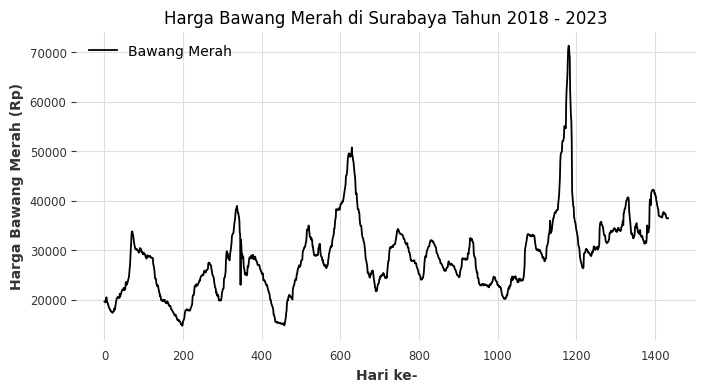

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(merah['Harga'], label='Bawang Merah')

plt.xlabel('Hari ke-')
plt.ylabel('Harga Bawang Merah (Rp)')
plt.title('Harga Bawang Merah di Surabaya Tahun 2018 - 2023')
plt.grid(True)
plt.legend()

# **Dikasih Tanggal Bawang Merah**

In [ ]:
#nobs = len(merah)
#dates = pd.date_range('2018-01-02', freq = "D", periods = nobs)
#merah.index = pd.Index(dates)
#del merah['Tanggal']

# **Melihat Tipe Data Bawang Merah**

In [ ]:
print(type(merah['Harga'][0]))

<class 'numpy.int64'>


# **Mengecek Harga Bawang Merah**

In [ ]:
print(merah['Harga'])

0       19650
1       19600
2       19550
3       19450
4       20100
        ...  
1429    36500
1430    36450
1431    36450
1432    36450
1433    36450
Name: Harga, Length: 1434, dtype: int64


# **Mengecek Seasonality Bawang Merah**

In [ ]:
check_seasonality(TimeSeries.from_series(merah['Harga']), m=None, max_lag=241, alpha=0.05) #alpha toleransi, tarafsignikan C

(True, 92)

# **Pembagian Data Bawang Merah**

In [ ]:
#Set up days of samples for test set
DayforTest = 125
train = merah.iloc[:-DayforTest]
test = merah.iloc[-DayforTest:]
# boolean series to index df rows
train_idx = merah.index <= train.index[-1]
test_idx = merah.index > train.index[-1]

# **Data Train Bawang Merah**

In [ ]:
train

,Tanggal,Harga,Unnamed: 2,Unnamed: 3,Unnamed: 4
time,,,,,
0,02/ 01/ 2018,19650,NaN,NaN,NaN
1,03/ 01/ 2018,19600,NaN,NaN,NaN
2,04/ 01/ 2018,19550,NaN,NaN,NaN
3,05/ 01/ 2018,19450,NaN,NaN,NaN
4,08/ 01/ 2018,20100,NaN,NaN,NaN
...,...,...,...,...,...
1304,02/ 01/ 2023,34000,NaN,NaN,NaN
1305,03/ 01/ 2023,34100,NaN,NaN,NaN
1306,04/ 01/ 2023,34550,NaN,NaN,NaN


# **Data Test Bawang Merah**

In [ ]:
test

,Tanggal,Harga,Unnamed: 2,Unnamed: 3,Unnamed: 4
time,,,,,
1309,09/ 01/ 2023,34150,NaN,NaN,NaN
1310,10/ 01/ 2023,33950,NaN,NaN,NaN
1311,11/ 01/ 2023,34100,NaN,NaN,NaN
1312,12/ 01/ 2023,33900,NaN,NaN,NaN
1313,13/ 01/ 2023,33950,NaN,NaN,NaN
...,...,...,...,...,...
1429,26/ 06/ 2023,36500,NaN,NaN,NaN
1430,27/ 06/ 2023,36450,NaN,NaN,NaN
1431,28/ 06/ 2023,36450,NaN,NaN,NaN


# **Pembuatan Model Bawang Merah**

In [ ]:
#Define the model
hw = ExponentialSmoothing(
    train['Harga'],
    #initialization_method='legacy-heuristic',
    initialization_method='estimated',
    trend='mul', seasonal='mul', seasonal_periods=92)
method='Powell'
#Train the model
history = hw.fit(method=method) #TNC #Sl
#In-Sample prediction
merah.loc[train_idx, 'HoltWintersTrain'] = history.fittedvalues
#Out-of-Sample Forcasting
merah.loc[test_idx, 'HoltWintersTest'] = history.forecast(DayforTest)
print(history.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Harga   No. Observations:                 1309
Model:             ExponentialSmoothing   SSE                      608134188.231
Optimized:                         True   AIC                          17272.994
Trend:                   Multiplicative   BIC                          17769.987
Seasonal:                Multiplicative   AICC                         17289.030
Seasonal Periods:                    92   Date:                 Sat, 12 Aug 2023
Box-Cox:                          False   Time:                         02:57:47
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8453529                alpha                 True
smoothing_trend          

# **Perbandingan Mape Bawang Merah**

In [ ]:
print(mape(train['Harga'], history.fittedvalues))
print(mape(test['Harga'], history.forecast(DayforTest)))

1.2854729083649505
12.241292515200762


# **Plot Perbandingan Data Train dan Data Test Bawang Merah**

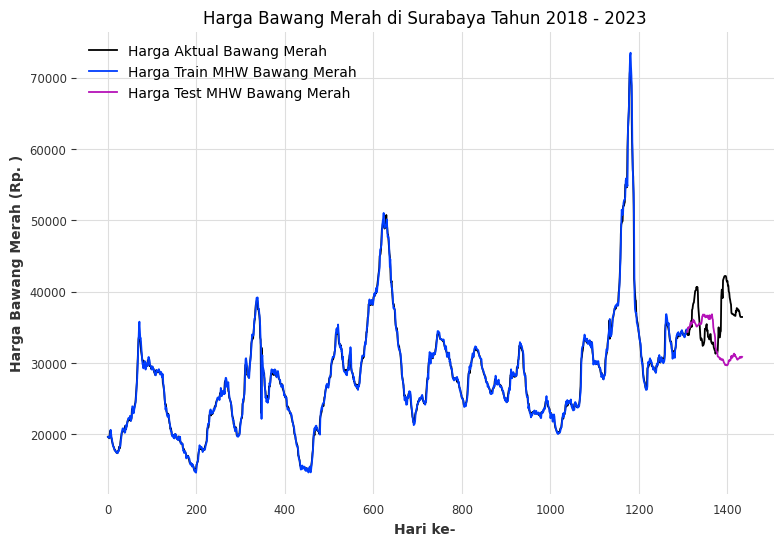

In [ ]:
# Plot the output
# We expect to see the close green line aligned to the blue line.
merah['Harga'].plot(figsize=(9, 6), label='Harga Aktual Bawang Merah')
plt.title('Harga Bawang Merah di Surabaya Tahun 2018 - 2023')

plt.plot(history.fittedvalues, label='Harga Train MHW Bawang Merah')
plt.plot(history.forecast(DayforTest), label='Harga Test MHW Bawang Merah')

plt.xlabel('Hari ke-')
plt.ylabel('Harga Bawang Merah (Rp. )')

plt.grid(True)
plt.legend()

# **Gabungkan Data Train dan Menerapkan Pada Model Bawang Merah**

In [ ]:
#Combine Train and Validation data set and apply the model
hw = ExponentialSmoothing(
    merah['Harga'],
    initialization_method='legacy-heuristic',
    trend='mul', seasonal='mul', seasonal_periods=92)
res_hw = hw.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


# **Hasil Harga Forecasting Bawang Merah**

In [ ]:
print(res_hw.forecast(steps=365))

1434    36653.060365
1435    37363.160493
1436    37750.464988
1437    38418.458581
1438    38240.230229
            ...     
1794    35237.171054
1795    35685.594326
1796    35994.079050
1797    36240.371251
1798    36475.193421
Length: 365, dtype: float64


# **Plot Hasil Forecasting Bawang Merah**

Text(0.5, 1.0, 'Perbandingan Harga Prediksi Bawang Merah di Surabaya')

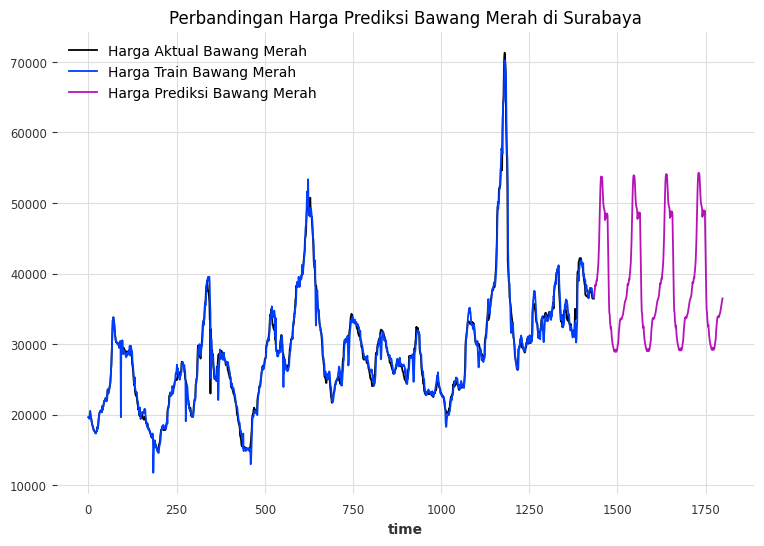

In [ ]:
# Forcasting Result
merah['HoltWintersall'] = res_hw.fittedvalues

merah['Harga'].plot(figsize=(9, 6), label='Harga Aktual Bawang Merah')
merah['HoltWintersall'].plot(figsize=(9, 6), label='Harga Train Bawang Merah')

forecast = res_hw.forecast(steps=365)
plt.plot(forecast, label='Harga Prediksi Bawang Merah')

list1 = np.array(forecast)
# print('365 days cumulated sales:', -list1[59])

plt.grid(True)
plt.legend()
plt.title('Perbandingan Harga Prediksi Bawang Merah di Surabaya')


# **Bawang Putih**

In [ ]:
putih = pd.read_excel('/content/Fix_Bawang Putih_fix.xlsx')
putih

,Tanggal,Harga
0,02/ 01/ 2018,17850
1,03/ 01/ 2018,18450
2,04/ 01/ 2018,18300
3,05/ 01/ 2018,18750
4,08/ 01/ 2018,18900
...,...,...
1440,11/ 07/ 2023,38700
1441,12/ 07/ 2023,38550
1442,13/ 07/ 2023,38250
1443,14/ 07/ 2023,37950


# **Perhitungan Komponen Bawang Putih**

In [ ]:
putih['Harga'] = pd.to_numeric(putih['Harga'], errors='coerce')

# Calculate the statistics (assuming the column now contains numeric values)
print('Harga Bawang Putih tertinggi = ', putih["Harga"].max())
print('Harga Bawang Putih terendah = ', putih["Harga"].min())
print('Harga Bawang Putih rata-rata =', putih["Harga"].mean())
Q1 = np.quantile(putih["Harga"], 0.25)
Q3 = np.quantile(putih["Harga"], 0.75)
print('Q1 = ', Q1)
print('Q3 = ', Q3)


Harga Bawang Putih tertinggi =  56500
Harga Bawang Putih terendah =  14500
Harga Bawang Putih rata-rata = 24462.53633217993
Q1 =  20600.0
Q3 =  26750.0


# **Grafik Bawang Putih**

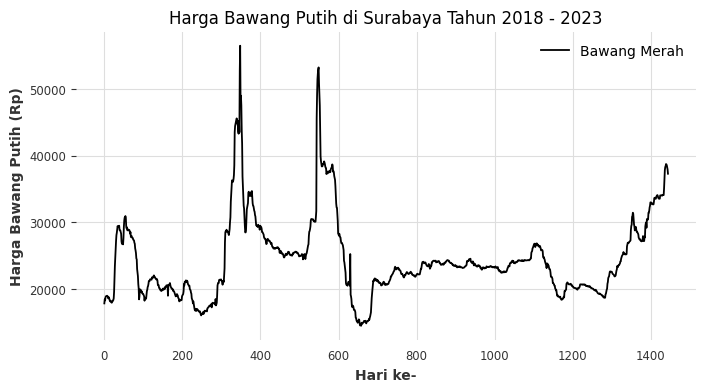

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(putih['Harga'], label='Bawang Merah')

plt.xlabel('Hari ke-')
plt.ylabel('Harga Bawang Putih (Rp)')
plt.title('Harga Bawang Putih di Surabaya Tahun 2018 - 2023')
plt.grid(True)
plt.legend()

# **Dikasih Tanggal Bawang Putih**

In [ ]:
#nobs = len(putih)
#dates = pd.date_range('2018-01-02', freq = "D", periods = nobs)
#putih.index = pd.Index(dates)
#del putih['Tanggal']

# **Melihat Tipe Data Bawang Putih**

In [ ]:
print(type(putih['Harga'][0]))

<class 'numpy.int64'>


# **Mengecek Harga Bawang Putih**

In [ ]:
print(putih['Harga'])

0       17850
1       18450
2       18300
3       18750
4       18900
        ...  
1440    38700
1441    38550
1442    38250
1443    37950
1444    37300
Name: Harga, Length: 1445, dtype: int64


# **Mengecek Seasonality Bawang Putih**

In [ ]:
check_seasonality(TimeSeries.from_series(putih['Harga']), m=None, max_lag=241, alpha=0.05)

(True, 211)

# **Pembagian Data Bawang Putih**

In [ ]:
#Set up days of samples for test set
DayforTest = 125
train = putih.iloc[:-DayforTest]  #62.4%
test = putih.iloc[-DayforTest:]   #37,6
# boolean series to index df rows
train_idx = putih.index <= train.index[-1]
test_idx = putih.index > train.index[-1]

# **Data Train Bawang Putih**

In [ ]:
train

,Tanggal,Harga
time,,
0,02/ 01/ 2018,17850
1,03/ 01/ 2018,18450
2,04/ 01/ 2018,18300
3,05/ 01/ 2018,18750
4,08/ 01/ 2018,18900
...,...,...
1315,17/ 01/ 2023,23350
1316,18/ 01/ 2023,23300
1317,19/ 01/ 2023,23550


# **Data Test Bawang Putih**

In [ ]:
test

,Tanggal,Harga
time,,
1320,24/ 01/ 2023,23750
1321,25/ 01/ 2023,23850
1322,26/ 01/ 2023,24150
1323,27/ 01/ 2023,24150
1324,30/ 01/ 2023,24550
...,...,...
1440,11/ 07/ 2023,38700
1441,12/ 07/ 2023,38550
1442,13/ 07/ 2023,38250


# **Pembuatan Model Bawang Putih**

In [ ]:
#Define the model
hw = ExponentialSmoothing(
    train['Harga'],
    #initialization_method='legacy-heuristic',
    initialization_method='estimated',
    trend='mul', seasonal='mul', seasonal_periods=211)
method='SLSQP'
#Train the model
# smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma,
history = hw.fit(method=method) #TNC
# In-Sample prediction
#In-Sample prediction
putih.loc[train_idx, 'HoltWintersTrain'] = history.fittedvalues
#Out-of-Sample Forcasting
putih.loc[test_idx, 'HoltWintersTest'] = history.forecast(DayforTest)
print(history.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Harga   No. Observations:                 1320
Model:             ExponentialSmoothing   SSE                      524709417.964
Optimized:                         True   AIC                          17448.718
Trend:                   Multiplicative   BIC                          18563.576
Seasonal:                Multiplicative   AICC                         17534.573
Seasonal Periods:                   211   Date:                 Sat, 12 Aug 2023
Box-Cox:                          False   Time:                         02:58:02
Box-Cox Coeff.:                    None                                         
                           coeff                 code              optimized      
----------------------------------------------------------------------------------
smoothing_level                0.9950000                alpha                 True
smoothing_trend       

# **Perbandingan Mape Bawang Putih**

In [ ]:
print(mape(train['Harga'], history.fittedvalues))
print(mape(test['Harga'], history.forecast(DayforTest)))

1.2625600197663207
9.10018696257721


# **Plot Perbandingan Data Train dan Data Test Bawang Putih**

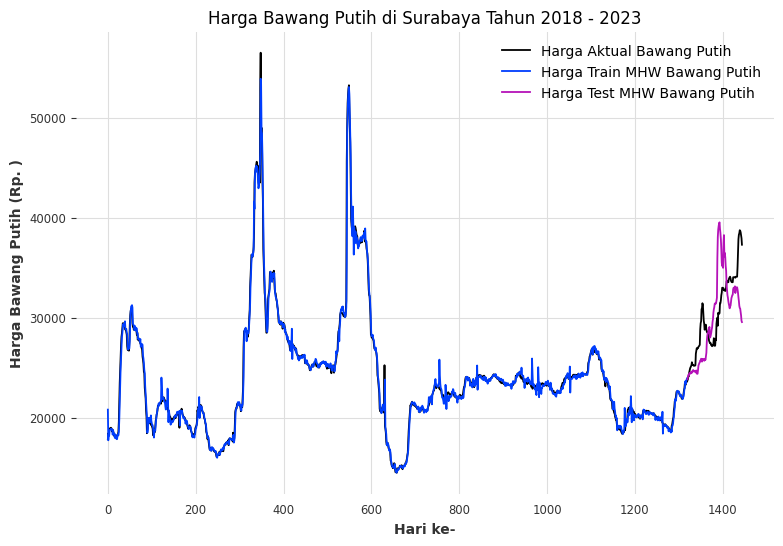

In [ ]:
# Plot the output
# We expect to see the close green line aligned to the blue line.
putih['Harga'].plot(figsize=(9, 6), label='Harga Aktual Bawang Putih')
plt.title('Harga Bawang Putih di Surabaya Tahun 2018 - 2023')

plt.plot(history.fittedvalues, label='Harga Train MHW Bawang Putih')
plt.plot(history.forecast(DayforTest), label='Harga Test MHW Bawang Putih')

plt.xlabel('Hari ke-')
plt.ylabel('Harga Bawang Putih (Rp. )')

plt.grid(True)
plt.legend()

# **Gabungkan Data Train dan Menerapkan Pada Model Bawang Putih**

In [ ]:
#Combine Train and Validation data set and apply the model
hw = ExponentialSmoothing(
    putih['Harga'],
    initialization_method='legacy-heuristic',
    trend='mul', seasonal='mul', seasonal_periods=211)
#smoothing_level=alpha, smoothing_slope=beta,smoothing_seasonal=gamma
res_hw = hw.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


# **Hasil Harga Forecasting Bawang Putih**

In [ ]:
print(res_hw.forecast(steps=365))

1445    37235.708648
1446    36984.254604
1447    36636.004483
1448    36352.137486
1449    36094.467989
            ...     
1805    55577.695097
1806    55802.021978
1807    55839.582813
1808    56040.772056
1809    55949.174143
Length: 365, dtype: float64


# **Plot Hasil Forecasting Bawang Putih**

Text(0.5, 1.0, 'Perbandingan Harga Prediksi Bawang Putih di Surabaya')

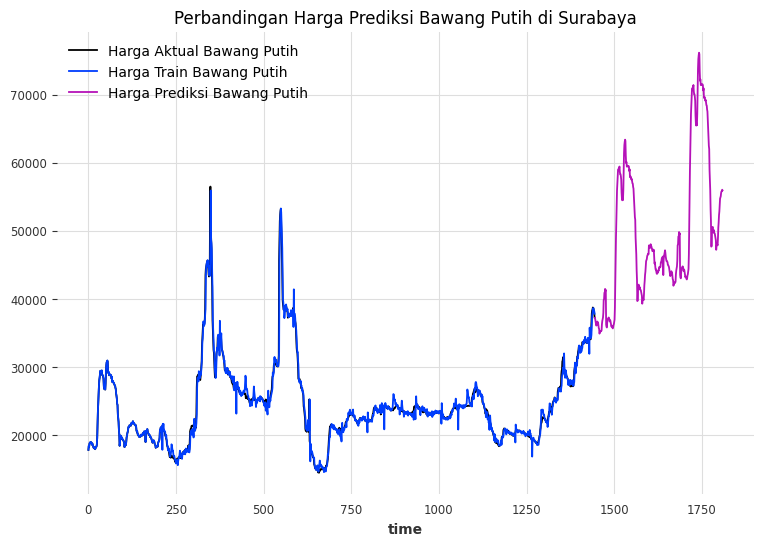

In [ ]:
# Forcasting Result
putih['HoltWintersall'] = res_hw.fittedvalues

putih['Harga'].plot(figsize=(9, 6), label='Harga Aktual Bawang Putih')
putih['HoltWintersall'].plot(figsize=(9, 6), label='Harga Train Bawang Putih')

forecast = res_hw.forecast(steps=365)
plt.plot(forecast, label='Harga Prediksi Bawang Putih')

list1 = np.array(forecast)
# print('365 days cumulated sales:', -list1[59])

plt.grid(True)
plt.legend()
plt.title('Perbandingan Harga Prediksi Bawang Putih di Surabaya')
